In [1]:
### note to self:
# environment = /Users/ShabanaH/Desktop/github_repositories/LCMS_example_proteins/alphapept
### python libraries needed:
# torch (Pytorch)
# sklearn
# matplotlib

## Dataset = iris
# data = X
# labels = target = y


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:
### Scikit-learn ###
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
## preprocess
# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Create dataloaders
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

## define neural network
class IrisNN(nn.Module):
    def __init__(self):
        super(IrisNN, self).__init__()
        self.layer1 = nn.Linear(4, 16)
        self.layer2 = nn.Linear(16, 12)
        self.layer3 = nn.Linear(12, 3)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = IrisNN()


In [7]:
##### ** changed model type to have consistency in data type
model = model.float()
for param in model.parameters():
    param.data = param.data.float()


In [8]:
## define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
## Train the model
##### ** epochs = iterations, passed forward and backward through network = 1

num_epochs = 100

for epoch in range(num_epochs):
    for data, targets in train_loader:
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Print loss every 10 epochs
    ##### ** losses determine how well the model is learning over epochs
    ##### ** losses are measured during training phase = eval of model training
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [10/100], Loss: 0.8228
Epoch [20/100], Loss: 0.4348
Epoch [30/100], Loss: 0.1470
Epoch [40/100], Loss: 0.5194
Epoch [50/100], Loss: 0.2649
Epoch [60/100], Loss: 0.0990
Epoch [70/100], Loss: 0.2616
Epoch [80/100], Loss: 0.1702
Epoch [90/100], Loss: 0.0466
Epoch [100/100], Loss: 0.3930


In [10]:
## evaluate model *function*
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_classes = y_pred.argmax(dim=1)
    accuracy = (y_pred_classes == y_test).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9667


In [11]:
## trainer_loader

import torch
from torch.utils.data import DataLoader, Dataset

# Define a custom dataset if needed, or use an existing one
class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]

# Example data and targets
data = X  # Your training data = ie) training loss viz = epoch iterations
targets = y  # Your training labels = ie) training loss viz = losses during model parameter updates

# Create a DataLoader
batch_size = 32  # Adjust to your needs
train_dataset = CustomDataset(data, targets)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# visualize training process w. train_loader


In [12]:
# VIZ #1 # Setting up data for visualization
import matplotlib
import matplotlib.pyplot as plt

# Lists to store training loss and test accuracy values
training_losses = []
test_accuracies = []

num_epochs = 100



In [13]:
for epoch in range(num_epochs):
    for batch_data, batch_targets in train_loader:
        # Cast input data to the same data type as the model
        batch_data = batch_data.float()  # Ensure that the data type matches
        
        # Forward pass
        outputs = model(batch_data)
        loss = criterion(outputs, batch_targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        training_losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            y_pred = model(X_test)
            y_pred_classes = y_pred.argmax(dim=1)
            accuracy = (y_pred_classes == y_test).float().mean()
            test_accuracies.append(accuracy)

Epoch [10/100], Loss: 0.1372
Epoch [20/100], Loss: 0.1626
Epoch [30/100], Loss: 0.1690
Epoch [40/100], Loss: 0.0593
Epoch [50/100], Loss: 0.0350
Epoch [60/100], Loss: 0.0504
Epoch [70/100], Loss: 0.0634
Epoch [80/100], Loss: 0.1056
Epoch [90/100], Loss: 0.0276
Epoch [100/100], Loss: 0.1060


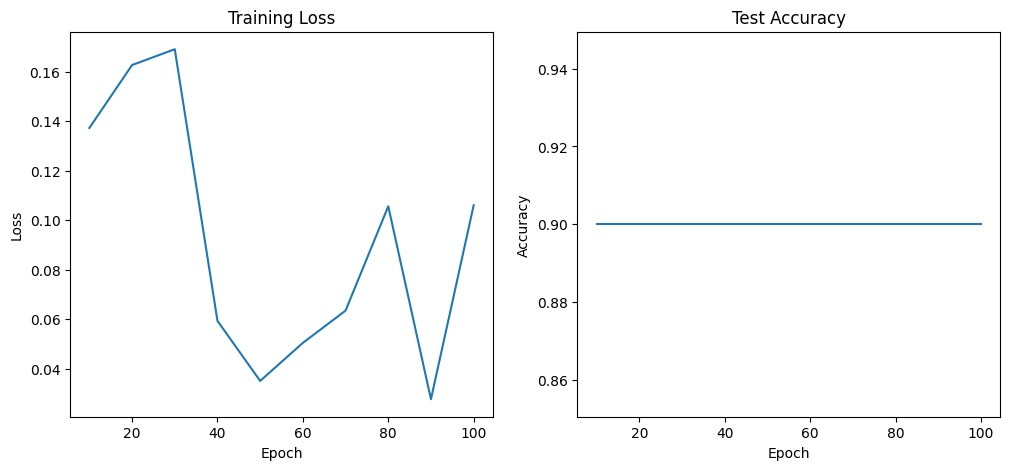

In [14]:
### PLOTTING ###

# Plot training loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(10, num_epochs + 1, 10), training_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(10, num_epochs + 1, 10), test_accuracies)
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()

In [15]:
## setup data for consistent format for VIZ 2

# Set the data type for the model's parameters to match the input data type
model = model.double()
for param in model.parameters():
    param.data = param.data.double()
    
    
# Pass your data through the model
with torch.no_grad():
    activations = []  # Clear any previous activations
    for data, _ in train_loader:  # Use the training data
        data = data.double()  # Convert input data to Double
        _ = model(data)


In [25]:
## further insight into hidden layers
#
# layer 1: IrisNN: self.layer1 = nn.Linear(4, 16)
# this indicates that the network took 4 features (sepal_L, sepal_W, petal_L, petal_W) and 
# created 16 nodes, which could be visualized as a adjacency matrix to see if features interact to determine spp
#
# layer 2: self.layer2 = nn.Linear(16, 12)
# indicating 16 nodes from layer 1 gets put in and output = 12
#
# layer 3: self.layer3 = nn.Linear(12, 3)
# 12 inputs from layer 2


In [16]:
## VIZ 2
## Visualizing feature/activations in neural network with non-image data ####

## using layer 2 = 16 nodes as input data from adjacency matrix
## with out put of 12
##### ** where each of the 16 nodes are match up against each other to
# determine a pattern to see if there is one feature that is more important than the others
# ie) to see if a pattern can be determined from the interaction of these 4 features
# and how they interact with themselves
####*** draw out these matrices to understand them better
#### or create a visualization heatmap of layers 1 and layer 3 as well

activations = []

def hook_fn(module, input, output):
    activations.append(output)

layer2 = model.layer2  # Replace with the layer you want to visualize
hook = layer2.register_forward_hook(hook_fn)


# Pass your data through the model
with torch.no_grad():
    activations = []  # Clear any previous activations
    for data, _ in train_loader:  # Use the training data
        _ = model(data)

# Remove the hook
hook.remove()


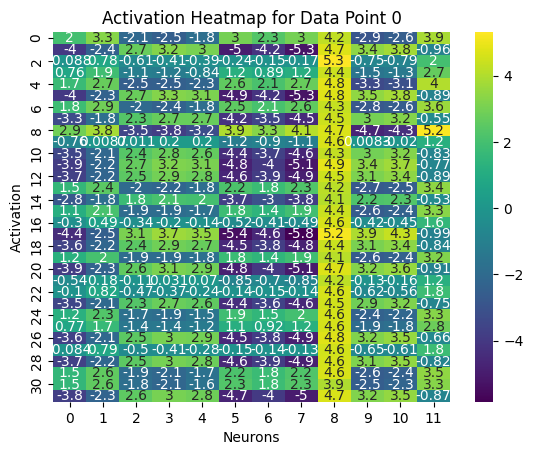

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the data point for which you want to visualize activations
data_point_index = 0  # Replace with the index of the data point you want to visualize

# Get the activations for the selected data point
selected_activations = activations[data_point_index]

# Plot the heatmap
sns.heatmap(selected_activations, cmap="viridis", annot=True)
plt.title("Activation Heatmap for Data Point {}".format(data_point_index))
plt.xlabel("Neurons")
plt.ylabel("Activation")
plt.show()

##### ** showing us how features (petal and sepal features)

In [19]:
### VIZ 3 ### feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names


In [20]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to the data
clf.fit(X, y)

RandomForestClassifier(random_state=0)

In [21]:
# Get feature importances from the trained model
feature_importances = clf.feature_importances_


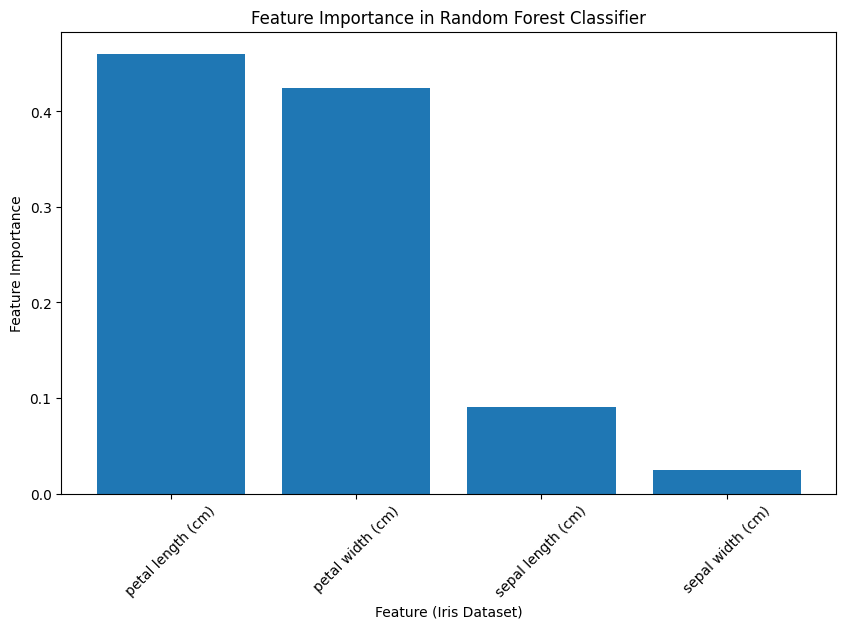

In [23]:
# Plot the feature importances with labeled axes
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=45)
plt.xlabel('Feature (Iris Dataset)')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

##### ** indicating that petal length is most important for distinguishing plant species
##### ** with the sepal characteristics being less important than petal features